# <b>Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα</b>

1η Εργαστηριακή Άσκηση

**Α) ΣΤΟΙΧΕΙΑ ΟΜΑΔΑΣ**

Αριθμός Ομάδας: M.B.9

Βλάχος Ιωάννης Α.Μ. 03115013<br>
Κασουρίδης Στυλιανός Α.Μ. 03115172<br>
Χαρδούβελης Γεώργιος-Ορέστης Α.Μ. 03115100<br>



In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data

--2019-12-20 18:06:47--  http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 712565 (696K) [application/x-httpd-php]
Saving to: ‘letter-recognition.data’

letter-recognition. 100%[===================>] 695.86K  2.66MB/s    in 0.3s    

2019-12-20 18:06:47 (2.66 MB/s) - ‘letter-recognition.data’ saved [712565/712565]



**Β) ΕΙΣΑΓΩΓΗ ΤΟΥ DATASET**

1. Το large dataset αναφέρται σε letter recognition.

2. Το big dataset περιέχει σε κάθε instance ένα κεφαλαίο γράμμα του αγγλικού αλφαβήτου. Τα γράμματα βρίσκονται σε 20 διαφορετικές γραμματοσειρές και παραποιήθηκαν τυχαία ώστε να δημιουργηθούν 20000 διαφορετικά ερεθίσματα. Κάθε ερέθισμα μετασχηματίστηκε σε 16 attributes, τα οποία είναι κυρίως στατιστικά στοιχεία και edge counts. 

3. Δεν υπάρχουν επικεφαλίδες ούτε αφαίρεση γραμμών.

4. Οι ετικέτες των κλάσεων ορίζονται ως ένα από τα 26 κεφαλαία γράμματα της αγγλικής αλφαβήτου Α-Ζ και βρίσκονται στην πρώτη στήλη των δεδομένων μας. 

5. Όπως φαίνεται παρακάτω, δεν χρειάστηκε κάποια επεξεργασία στα αρχεία, απλώς διαβάστηκαν χρησιμοποιώντας την βιβλιοθήκη panda.

6. Δεν υπάρχουν απουσιάζουσες τιμές.

In [ ]:
import numpy as np
import pandas
df = pandas.read_csv('letter-recognition.data',header=None)
large = df.to_numpy()

letters = np.zeros(26)
for i in large:
  letters[ord(i[0])-65]+=1

print('For each letter, the samples are')
print(letters)
print()
print('For each letter, the percentages are')
print(letters/20000)

#proof that large dataset is balanced
for i in range(len(letters)):
  for j in range(i+1,len(letters)):
    if (letters[i] > 1.5*letters[j]):
      print('Unbalanced')
      break

For each letter, the samples are
[789. 766. 736. 805. 768. 775. 773. 734. 755. 747. 739. 761. 792. 783.
 753. 803. 783. 758. 748. 796. 813. 764. 752. 787. 786. 734.]

For each letter, the percentages are
[0.03945 0.0383  0.0368  0.04025 0.0384  0.03875 0.03865 0.0367  0.03775
 0.03735 0.03695 0.03805 0.0396  0.03915 0.03765 0.04015 0.03915 0.0379
 0.0374  0.0398  0.04065 0.0382  0.0376  0.03935 0.0393  0.0367 ]


7. Οι κλάσεις είναι 26, όσα και τα γράμματα Α-Ζ. Παραπάνω έχουμε σημειώσει το ποσοστό των δειγμάτων για κάθε κλάση σε έναν πίνακα. Τα δείγματα είναι διαμοιρασμένα αρκετά ομοιόμορφα και όπως διαπιστώνουμε και από τον παραπάνω κώδικα δεν υπάρχουν ανισορροπίες στο data set.

8. Διαχωρίζουμε στη συνέχεια σε train και test set παίρνοντας με τυχαίο τρόπο 30% των δειγμάτων και κρατάμε τα labels της πρώτης στήλης σε διαφορετικούς πίνακες.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(large[:,1:], large[:,0], test_size = 0.3,\
                                                        random_state = 94)

**Γ) BASELINE CLASSIFICATION**

1. Εκτελέσαμε classification χρησιμοποιώντας τους Dummy, K-Nearest Neighbors, Gaussian-NB και Multilayer Perceptron Neural (MLP). Παρακάτω φαίνεται για κάθε έναν από αυτούς το confusion matrix και οι τεχνικές f1-micro και f1-macro.

In [ ]:
f1micros = []
f1macros = []
cm = []

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The confusion matrix of the test set is:
Confusion matrix, without normalization


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 micro is  0.04066666666666666
F1 macro is  0.0030059626472182526
Precision score is  0.04066666666666666
Recall  score is  0.04066666666666666
Accuracy score is  0.04066666666666666


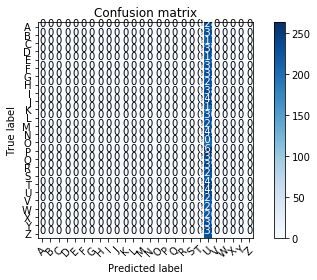

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

lets = ['A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print('The confusion matrix of the test set is:')
predvec = dummy_clf.predict(X_test)
cm.append(confusion_matrix(y_test,predvec))
plot_confusion_matrix(cm[0], lets)
f1micros.append(f1_score(y_test,predvec,average='micro'))
f1macros.append(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1micros[0])
print("F1 macro is ", f1macros[0])
print("Precision score is ", precision_score(y_test, predvec, average='micro'))
print("Recall  score is ", recall_score(y_test, predvec, average='micro'))
d_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", d_acc)

The confusion matrix of the test set is:
Confusion matrix, without normalization
F1 micro is  0.6498333333333334
F1 macro 0.6455461768845954
Precision score is  0.6498333333333334
Recall  score is  0.6498333333333334
Accuracy score is  0.6498333333333334


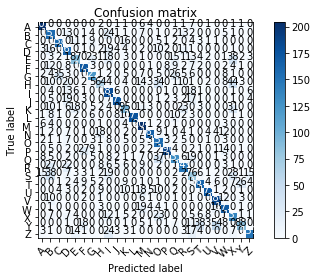

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
print('The confusion matrix of the test set is:')
predvec = gnb_clf.predict(X_test)
cm.append(confusion_matrix(y_test,predvec))
plot_confusion_matrix(cm[1], lets)
f1micros.append(f1_score(y_test,predvec,average='micro'))
f1macros.append(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1micros[1])
print("F1 macro", f1macros[1])
print("Precision score is ", precision_score(y_test, predvec, average='micro'))
print("Recall  score is ", recall_score(y_test, predvec, average='micro'))
g_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", g_acc)

The confusion matrix of the test set is:
Confusion matrix, without normalization
F1 micro is  0.943
F1 macro 0.9431386406841958
Precision score is  [0.97854077 0.83208955 0.95391705 0.88888889 0.89224138 0.88034188
 0.92916667 0.87336245 0.92682927 0.97356828 0.9119171  0.99118943
 0.98230088 0.97777778 0.89777778 0.95934959 0.96888889 0.91452991
 0.99061033 0.96680498 0.99166667 0.96412556 0.99545455 0.96713615
 0.958159   0.97844828]
Recall  score is  [1.         0.9612069  0.97641509 0.93723849 0.94954128 0.88793103
 0.9612069  0.87336245 0.95798319 0.92083333 0.83018868 0.97826087
 0.98230088 0.91666667 0.97584541 0.8973384  0.91596639 0.89539749
 0.95475113 0.93574297 0.97540984 0.96412556 0.99545455 0.93636364
 0.97033898 0.97844828]
Accuracy score is  0.943


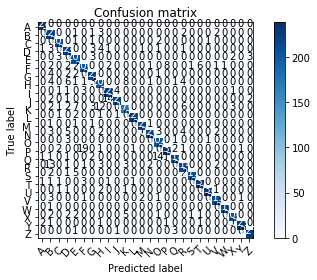

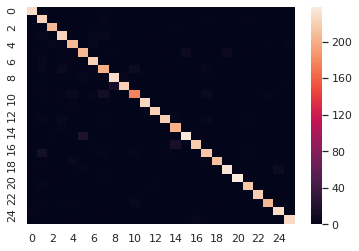

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn_clf = KNN(n_neighbors=3)
knn_clf.fit(X_train, y_train)
print('The confusion matrix of the test set is:')
predvec = knn_clf.predict(X_test)
cm.append(confusion_matrix(y_test,predvec))
plot_confusion_matrix(cm[2], lets)
f1micros.append(f1_score(y_test,predvec,average='micro'))
f1macros.append(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1micros[2])
print("F1 macro", f1macros[2])
#print("Precision score is ", precision_score(y_test, predvec, average='weighted'))
#print("Recall  score is ", recall_score(y_test, predvec, average='weighted'))
print("Precision score is ", precision_score(y_test, predvec, average=None))
print("Recall  score is ", recall_score(y_test, predvec, average=None))
knn_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", knn_acc)

plt.figure()
import seaborn as sns; sns.set()
ax = sns.heatmap(cm[2])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The confusion matrix of the test set is:
Confusion matrix, without normalization
F1 micro is  0.9133333333333333
F1 macro 0.9133893496994039
Precision score is  0.91551289208872
Recall  score is  0.9139051125190261
Accuracy score is  0.9133333333333333


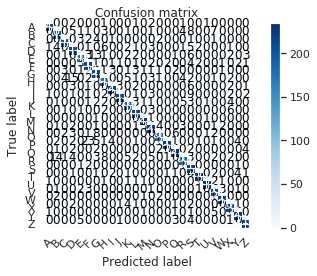

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
print('The confusion matrix of the test set is:')
predvec = mlp_clf.predict(X_test)
cm.append(confusion_matrix(y_test,predvec))
plot_confusion_matrix(cm[3], lets)
f1micros.append(f1_score(y_test,predvec,average='micro'))
f1macros.append(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1micros[3])
print("F1 macro", f1macros[3])
print("Precision score is ", np.mean(precision_score(y_test, predvec,average=None)))
print("Recall  score is ", np.mean(recall_score(y_test, predvec, average=None)))
mlp_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", mlp_acc)

2. Για κάθε averaged metric (f1-micro average και f1-macro average) εκτυπώνουμε παρακάτω το bar plot σύγκρισης με τις τιμές για όλους τους classifiers.

[Text(0, 0, 'Dummy'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, '3NN'),
 Text(0, 0, 'MLP')]

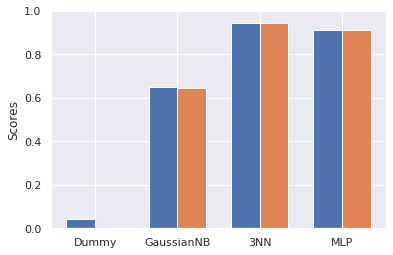

In [ ]:
import matplotlib.pyplot as plt
labels = ['Dummy','GaussianNB','3NN','MLP']

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1micros, width, label='Micro')
rects2 = ax.bar(x + width/2, f1macros, width, label='Macro')
ax.set_ylabel('Scores')
ax.set_ylim(top=1)
ax.set_xticks(x)
ax.set_xticklabels(labels)

In [ ]:
'''
for mat in cm:
  true_pos = np.diag(mat)
  false_pos = np.sum(mat, axis=0) - true_pos
  false_neg = np.sum(mat, axis=1) - true_pos

  precision = np.sum(true_pos / (true_pos + false_pos))
  recall = np.sum(true_pos / (true_pos + false_neg))
  print(precision,recall)
  '''

'\nfor mat in cm:\n  true_pos = np.diag(mat)\n  false_pos = np.sum(mat, axis=0) - true_pos\n  false_neg = np.sum(mat, axis=1) - true_pos\n\n  precision = np.sum(true_pos / (true_pos + false_pos))\n  recall = np.sum(true_pos / (true_pos + false_neg))\n  print(precision,recall)\n  '

3. Παρατηρούμε ότι ο Dummy αναμενόμενα επιτυγχάνει τα χειρότερα αποτελέσματα, καθώς δεν περιέχει καμία τεχνική διάκρισης μεταξύ των διαφορετικών classifications. Ο Gaussian-NB, επειδή δεν λαμβάνει υπ' όψιν τις αλληλοεξαρτήσεις μεταξύ των διαφορετικών χαρακτηριστικών, επιτυγχάνει με τη σειρά του αναμενόμενα χειρότερα αποτελέσματα από τους (καλύτερους ταξινομητές) 3NN (3-Nearest Neighbors) και MLP. Όσον αφορά το precision και το recall, τα εκτυπώνουμε σε μορφή πίνακα για κάθε έναν από τους classifiers, καθώς έχουν και μία διαφορετική τιμή για κάθε label.

**Δ) ΒΕΛΤΙΣΤΟΠΟΙΗΣΗ ΤΑΞΙΝΟΜΗΤΩΝ**

1. Παρακάτω χρησιμοποιήθηκε grid search για κάθε έναν από τους classifiers, με τις εκάστοτε υπερπαραμέτρους προς βελτίωση. Η διαδικασία αυτή εκτελέστηκε για τους Dummy, GNB, kNN, MLP. Η προεπεξεργασία ήταν κοινή για όλους τους classifiers. Συγκεκριμένα, οι υπερπαράμετροι προς βελτίωση για τους classifiers ήταν οι εξής:


*   **Για τον Dummy classifier**: Strategies.

*   **Για τον Gaussian NB Classifier**: Var_smoothing.

*   **Για τον k-Nearest Neighbors**: k (number of neighbors).

*   **Για το MLP Neural**: Activation, Solver, Max_iter, learning_rate, alpha.




In [ ]:
f1micros = []
f1macros = []

[3.672615301020394 10.957016280612612 4.046449994897696 5.115609775509205
 4.774568489796832 4.093684443877075 5.406564061222767 7.305320607143059
 5.655631816326616 6.120231994898109 6.930085872448455 4.338453693877865
 5.458170918367097 2.421877749999996 6.558748525510411 2.624420408163097]
10.957016280612612


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           A       0.00      0.00      0.00       228
           B       0.00      0.00      0.00       232
           C       0.00      0.00      0.00       212
           D       0.00      0.00      0.00       239
           E       0.00      0.00      0.00       218
           F       0.00      0.00      0.00       232
           G       0.00      0.00      0.00       232
           H       0.00      0.00      0.00       229
           I       0.00      0.00      0.00       238
           J       0.00      0.00      0.00       240
           K       0.00      0.00      0.00       212
           L       0.00      0.00      0.00       230
           M       0.00      0.00      0.00       226
           N       0.00      0.00      0.00       240
           O       0.00      0.00      0.00       207
           P       0.00      0.00      0.00       263
           Q       0.00      0.00      0.00       238
           R       0.00    

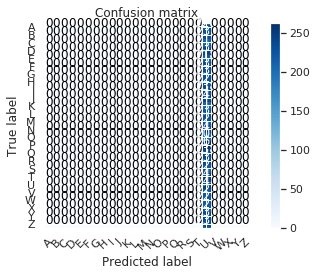

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time

acc_d=[]

train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

selector = VarianceThreshold()
scaler = StandardScaler()
vthreshold = [0, 2.5, 3] 
n_components = range(1,16,4)
ws = ['uniform', 'distance']
ms = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
arr = ["most_frequent", "stratified", "prior", "uniform"]
pca = PCA()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('dummy', dummy_clf)], memory = 'tmp')
estimator_dummy_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, dummy__strategy=arr), cv=5, scoring='f1_micro', n_jobs=-1)
tim_dummy_micro = [0,0]
tim_dummy_micro[0] = -time.time()
estimator_dummy_micro.fit(X_train, y_train)
tim_dummy_micro[0] += time.time()
tim_dummy_micro[1] = -time.time()
preds = estimator_dummy_micro.predict(X_test)
tim_dummy_micro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_dummy_micro.best_estimator_)
print(estimator_dummy_micro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

[3.672615301020394 10.957016280612612 4.046449994897696 5.115609775509205
 4.774568489796832 4.093684443877075 5.406564061222767 7.305320607143059
 5.655631816326616 6.120231994898109 6.930085872448455 4.338453693877865
 5.458170918367097 2.421877749999996 6.558748525510411 2.624420408163097]
10.957016280612612
              precision    recall  f1-score   support

           A       0.05      0.04      0.05       228
           B       0.04      0.03      0.04       232
           C       0.02      0.02      0.02       212
           D       0.05      0.05      0.05       239
           E       0.04      0.04      0.04       218
           F       0.03      0.03      0.03       232
           G       0.02      0.02      0.02       232
           H       0.04      0.04      0.04       229
           I       0.03      0.03      0.03       238
           J       0.05      0.05      0.05       240
           K       0.03      0.04      0.04       212
           L       0.04      0.04     

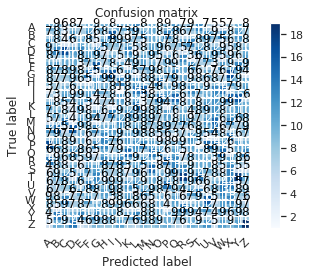

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('dummy', dummy_clf)], memory = 'tmp')
estimator_dummy_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, dummy__strategy=arr), cv=5, scoring='f1_macro', n_jobs=-1)
tim_dummy_macro = [0,0]
tim_dummy_macro[0] = -time.time()
estimator_dummy_macro.fit(X_train, y_train)
tim_dummy_macro[0] += time.time()
tim_dummy_macro[1] = -time.time()
preds = estimator_dummy_macro.predict(X_test)
tim_dummy_macro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_dummy_macro.best_estimator_)
print(estimator_dummy_macro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

[3.672615301020394 10.957016280612612 4.046449994897696 5.115609775509205
 4.774568489796832 4.093684443877075 5.406564061222767 7.305320607143059
 5.655631816326616 6.120231994898109 6.930085872448455 4.338453693877865
 5.458170918367097 2.421877749999996 6.558748525510411 2.624420408163097]
10.957016280612612
              precision    recall  f1-score   support

           A       0.88      0.87      0.88       228
           B       0.52      0.78      0.62       232
           C       0.78      0.72      0.75       212
           D       0.67      0.76      0.71       239
           E       0.61      0.57      0.59       218
           F       0.58      0.69      0.63       232
           G       0.53      0.46      0.49       232
           H       0.41      0.28      0.33       229
           I       0.80      0.77      0.79       238
           J       0.83      0.74      0.78       240
           K       0.62      0.53      0.57       212
           L       0.82      0.75     

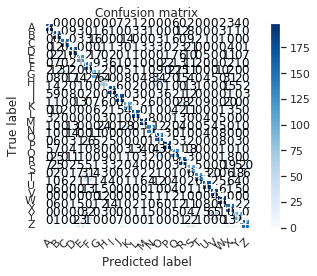

In [ ]:
clf = GaussianNB()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', clf)], memory = 'tmp')
estimator_gnb_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, gnb__var_smoothing=varsmoothing), cv=5, scoring='f1_micro', n_jobs=-1)
tim_gnb_micro = [0,0]
tim_gnb_micro[0] = -time.time()
estimator_gnb_micro.fit(X_train, y_train)
tim_gnb_micro[0] += time.time()
tim_gnb_micro[1] = -time.time()
preds = estimator_gnb_micro.predict(X_test)
tim_gnb_micro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_gnb_micro.best_estimator_)
print(estimator_gnb_micro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

[3.672615301020394 10.957016280612612 4.046449994897696 5.115609775509205
 4.774568489796832 4.093684443877075 5.406564061222767 7.305320607143059
 5.655631816326616 6.120231994898109 6.930085872448455 4.338453693877865
 5.458170918367097 2.421877749999996 6.558748525510411 2.624420408163097]
10.957016280612612
              precision    recall  f1-score   support

           A       0.87      0.85      0.86       228
           B       0.55      0.80      0.65       232
           C       0.73      0.72      0.72       212
           D       0.69      0.77      0.73       239
           E       0.64      0.55      0.59       218
           F       0.59      0.69      0.64       232
           G       0.63      0.51      0.57       232
           H       0.54      0.37      0.44       229
           I       0.79      0.74      0.76       238
           J       0.79      0.74      0.77       240
           K       0.54      0.58      0.56       212
           L       0.95      0.74     

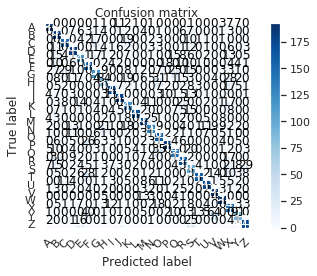

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
vthreshold = [0, 2.5, 3] 
varsmoothing = [1e-9,1e-7,1e-11]
n_components = range(1,16,4)
ws = ['uniform', 'distance']
ms = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
pca = PCA()
clf = GaussianNB()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', clf)], memory = 'tmp')
estimator_gnb_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, gnb__var_smoothing=varsmoothing), cv=5, scoring='f1_macro', n_jobs=-1)
tim_gnb_macro = [0,0]
tim_gnb_macro[0] = -time.time()
estimator_gnb_macro.fit(X_train, y_train)
tim_gnb_macro[0] += time.time()
tim_gnb_macro[1] = -time.time()
preds = estimator_gnb_macro.predict(X_test)
tim_gnb_macro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_gnb_macro.best_estimator_)
print(estimator_gnb_macro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

[3.672615301020394 10.957016280612612 4.046449994897696 5.115609775509205
 4.774568489796832 4.093684443877075 5.406564061222767 7.305320607143059
 5.655631816326616 6.120231994898109 6.930085872448455 4.338453693877865
 5.458170918367097 2.421877749999996 6.558748525510411 2.624420408163097]
10.957016280612612
              precision    recall  f1-score   support

           A       0.98      0.99      0.98       228
           B       0.87      0.91      0.89       232
           C       0.95      0.97      0.96       212
           D       0.92      0.94      0.93       239
           E       0.91      0.91      0.91       218
           F       0.91      0.87      0.89       232
           G       0.94      0.93      0.94       232
           H       0.87      0.87      0.87       229
           I       0.93      0.95      0.94       238
           J       0.94      0.92      0.93       240
           K       0.87      0.83      0.85       212
           L       0.98      0.97     

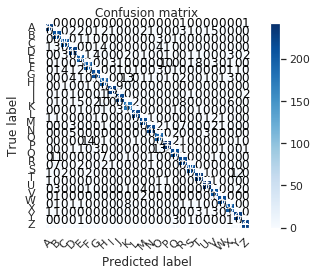

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
vthreshold = [0, 2.5, 3] 
n_components = range(1,16,4)
k = [1, 3, 5, 9]
ws = ['uniform', 'distance']
ms = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
pca = PCA()
clf = KNN(n_jobs=-1)

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)], memory = 'tmp')
estimator_knn_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__weights=ws,
                                              kNN__metric=ms), cv=5, scoring='f1_micro', n_jobs=-1)
tim_knn_micro = [0,0]
tim_knn_micro[0] = -time.time()
estimator_knn_micro.fit(X_train, y_train)
tim_knn_micro[0] += time.time()
tim_knn_micro[1] = -time.time()
preds = estimator_knn_micro.predict(X_test)
tim_knn_micro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_knn_micro.best_estimator_)
print(estimator_knn_micro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

[3.672615301020394 10.957016280612612 4.046449994897696 5.115609775509205
 4.774568489796832 4.093684443877075 5.406564061222767 7.305320607143059
 5.655631816326616 6.120231994898109 6.930085872448455 4.338453693877865
 5.458170918367097 2.421877749999996 6.558748525510411 2.624420408163097]
10.957016280612612
              precision    recall  f1-score   support

           A       0.98      0.99      0.98       228
           B       0.87      0.91      0.89       232
           C       0.95      0.97      0.96       212
           D       0.92      0.94      0.93       239
           E       0.91      0.91      0.91       218
           F       0.91      0.87      0.89       232
           G       0.94      0.93      0.94       232
           H       0.87      0.87      0.87       229
           I       0.93      0.95      0.94       238
           J       0.94      0.92      0.93       240
           K       0.87      0.83      0.85       212
           L       0.98      0.97     

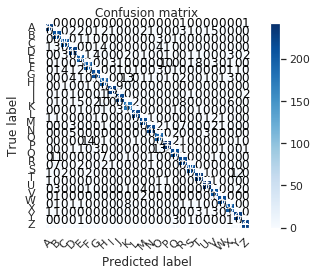

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
vthreshold = [0, 2.5, 3] 
n_components = range(1,16,4)
k = [1, 3, 5, 9]
ws = ['uniform', 'distance']
ms = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
pca = PCA()
clf = KNN(n_jobs=-1)

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)], memory = 'tmp')
estimator_knn_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__weights=ws,
                                              kNN__metric=ms), cv=5, scoring='f1_macro', n_jobs=-1)
tim_knn_macro = [0,0]
tim_knn_macro[0] = -time.time()
estimator_knn_macro.fit(X_train, y_train)
tim_knn_macro[0] += time.time()
tim_knn_macro[1] = -time.time()
preds = estimator_knn_macro.predict(X_test)
tim_knn_macro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_knn_macro.best_estimator_)
print(estimator_knn_macro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           A       0.91      0.89      0.90       228
           B       0.70      0.81      0.75       232
           C       0.88      0.80      0.83       212
           D       0.81      0.85      0.83       239
           E       0.73      0.80      0.76       218
           F       0.78      0.78      0.78       232
           G       0.73      0.68      0.70       232
           H       0.79      0.63      0.70       229
           I       0.90      0.84      0.87       238
           J       0.90      0.81      0.85       240
           K       0.73      0.76      0.75       212
           L       0.88      0.83      0.85       230
           M       0.89      0.88      0.89       226
           N       0.88      0.82      0.85       240
           O       0.75      0.85      0.79       207
           P       0.89      0.79      0.84       263
           Q       0.81      0.80      0.80       238
           R       0.71    

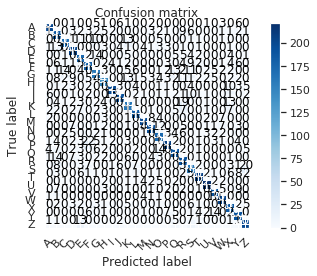

In [ ]:
hls = [(10), (20)]
activ = ['tanh','relu']
solve = ['sgd','adam']
max_it = range(10, 100, 70)
lr=['constant','adaptive']
a=[0.0001, 0.05]

pca = PCA()
clf = MLPClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('MLP', clf)], memory = 'tmp')
estimator_mlp_micro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,MLP__hidden_layer_sizes=hls, MLP__activation=activ, MLP__solver=solve,
                                    MLP__max_iter=max_it, MLP__learning_rate=lr, MLP__alpha=a), cv=5, scoring='f1_micro', n_jobs=-1)

tim_mlp_micro = [0,0]
tim_mlp_micro[0] = -time.time()
estimator_mlp_micro.fit(X_train, y_train)
tim_mlp_micro[0] += time.time()
tim_mlp_micro[1] = -time.time()
preds = estimator_mlp_micro.predict(X_test)
tim_mlp_micro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_mlp_micro.best_estimator_)
print(estimator_mlp_micro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           A       0.87      0.91      0.89       228
           B       0.69      0.83      0.75       232
           C       0.91      0.85      0.88       212
           D       0.73      0.82      0.78       239
           E       0.76      0.83      0.79       218
           F       0.74      0.72      0.73       232
           G       0.70      0.69      0.69       232
           H       0.79      0.65      0.71       229
           I       0.88      0.87      0.87       238
           J       0.91      0.83      0.87       240
           K       0.76      0.76      0.76       212
           L       0.89      0.85      0.87       230
           M       0.87      0.89      0.88       226
           N       0.91      0.84      0.87       240
           O       0.78      0.83      0.80       207
           P       0.90      0.82      0.86       263
           Q       0.81      0.74      0.77       238
           R       0.74    

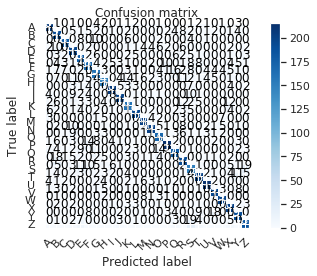

In [ ]:
hls = [(10), (20)]
activ = ['tanh','relu']
solve = ['sgd','adam']
max_it = range(10, 100, 70)
lr=['constant','adaptive']
a=[0.0001, 0.05]

pca = PCA()
clf = MLPClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('MLP', clf)], memory = 'tmp')
estimator_mlp_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,MLP__hidden_layer_sizes=hls, MLP__activation=activ, MLP__solver=solve,
                                    MLP__max_iter=max_it, MLP__learning_rate=lr, MLP__alpha=a), cv=5, scoring='f1_macro', n_jobs=-1)

tim_mlp_macro = [0,0]
tim_mlp_macro[0] = -time.time()
estimator_mlp_macro.fit(X_train, y_train)
tim_mlp_macro[0] += time.time()
tim_mlp_macro[1] = -time.time()
preds = estimator_mlp_macro.predict(X_test)
tim_mlp_macro[1] += time.time()
print(classification_report(y_test, preds))
print(estimator_mlp_macro.best_estimator_)
print(estimator_mlp_macro.best_params_)
f1micros.append(f1_score(y_test,preds,average='micro'))
f1macros.append(f1_score(y_test,preds,average='macro'))

plot_confusion_matrix(confusion_matrix(y_test,preds), lets)

print("Precision score is ", precision_score(y_test, preds, average=None))
print("Recall  score is ", recall_score(y_test, preds, average=None))
acc_d.append(accuracy_score(y_test, preds))
print("Accuracy score is ", acc_d[-1])

2. 


Για κάθε έναν από τους ταξινομητές (και για τις δύο μετρικές απόδοσης) εκτυπώνεται ο αντίστοιχος πίνακας στον οποίο αναγράφονται οι χρόνοι εκτέλεσης του fit και του predict.

Συγκεκριμένα, παρακάτω βλέπουμε τη χρονική διάρκεια (πρώτα για το fit και μετά για το predict), για τους ταξινομητές Dummy, GaussianNB, 3NN και MLP αντίστοιχα,και για τις δύο βελτιστοποιήσεις των μετρικών f1-micro και f1-macro:

In [ ]:
print('Fit and predict time for Dummy, improvement of f1-micro:')
print(tim_dummy_micro)
print('Fit and predict time for Dummy, improvement of f1-macro:')
print(tim_dummy_macro)
print('Fit and predict time for GaussianNB, improvement of f1-micro:')
print(tim_gnb_micro)
print('Fit and predict time for GaussianNB, improvement of f1-macro:')
print(tim_gnb_macro)
print('Fit and predict time for 3NN, improvement of f1-micro:')
print(tim_knn_micro)
print('Fit and predict time for 3NN, improvement of f1-macro:')
print(tim_knn_macro)
print('Fit and predict time for MLP, improvement of f1-micro:')
print(tim_mlp_micro)
print('Fit and predict time for MLP, improvement of f1-macro:')
print(tim_mlp_macro)

Fit and predict time for Dummy, improvement of f1-micro:
[222.14821338653564, 0.008290767669677734]
Fit and predict time for Dummy, improvement of f1-macro:
[190.60171341896057, 0.008008718490600586]
Fit and predict time for GaussianNB, improvement of f1-micro:
[144.9163601398468, 0.026051998138427734]
Fit and predict time for GaussianNB, improvement of f1-macro:
[146.08735752105713, 0.023125886917114258]
Fit and predict time for 3NN, improvement of f1-micro:
[216.22691655158997, 0.4278900623321533]
Fit and predict time for 3NN, improvement of f1-macro:
[215.3340072631836, 0.42332005500793457]
Fit and predict time for MLP, improvement of f1-micro:
[3565.6814737319946, 0.01318216323852539]
Fit and predict time for MLP, improvement of f1-macro:
[3656.15700674057, 0.013185501098632812]


3. 


Παρακάτω εκτυπώνεται το bar plot για κάθε classifier και για κάθε συνδυασμό αποτελεσμάτων του gridsearch που βελτιστοποιεί τα αποτελέσματα της κάθε μετρικής (f1-micro και f1-macro). Να τονίσουμε ότι στο συγκεκριμένο bar plot υπολογίζεται το f1-micro και το f1-macro score ανεξάρτητα από το ποια μετρική στόχευαν να βελτιστοποιήσουν στο gridsearch. 

Παρατηρούμε από τα αποτελέσματα του bar plot, ότι σε γενικές γραμμές οι μετρικές f1-micro και f1-macro πετυχαίνουν παρόμοια αποτελέσματα, με μοναδική εξαίρεση τον Dummy. 

Συγκεκριμένα, όσον αφορά τον Dummy, για τη βελτιστοποίηση του f1-micro παρατηρούμε ότι η μετρική f1-micro είναι κοντά στο 0.07, ενώ η μετρική f1-macro είναι 0, σε αντίθεση με την αντίστοιχη βελτιστοποίηση του f1-macro που δίνει παρόμοια αποτελέσματα για τις μετρικές f1-micro και f1-macro.

Όσον αφορά τον GaussianNB, για τις βελτιστοποιήσεις των δύο μετρικών, παίρνουμε παρόμοια αποτελέσματα (λίγο καλύτερα ως προς τη μετρική f1-micro) και για τις δύο βελτιστοποιήσεις, ενώ στους classifiers 3NN και MLP, παίρνουμε σχεδόν πανομοιότυπα αποτελέσματα ως προς τις δύο μετρικές και για τις δύο βελτιστοποιήσεις.

[Text(0, 0, 'DummyMicro'),
 Text(0, 0, 'DummyMacro'),
 Text(0, 0, 'GaussianNBMicro'),
 Text(0, 0, 'GaussianNBMacro'),
 Text(0, 0, '3NNMicro'),
 Text(0, 0, '3NNMacro'),
 Text(0, 0, 'MLPMicro'),
 Text(0, 0, 'MLPMacro')]

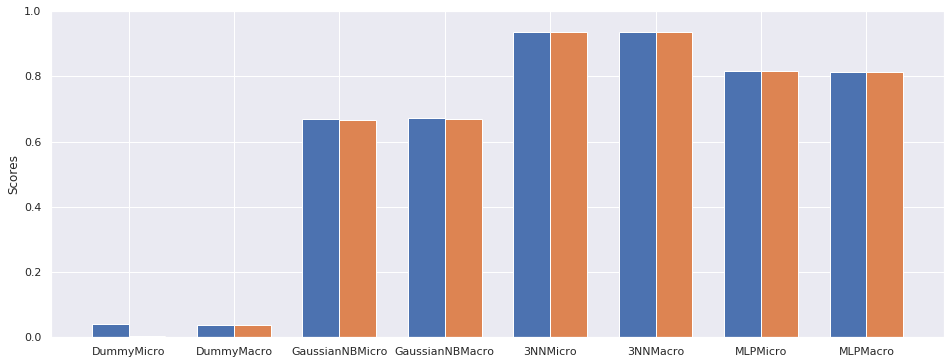

In [ ]:
import matplotlib.pyplot as plt
labels = ['DummyMicro','DummyMacro','GaussianNBMicro','GaussianNBMacro','3NNMicro','3NNMacro','MLPMicro','MLPMacro']

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(16,6))
rects1 = ax.bar(x - width/2, f1micros, width, label='Micro')
rects2 = ax.bar(x + width/2, f1macros, width, label='Macro')
ax.set_ylabel('Scores')
ax.set_ylim(top=1)
ax.set_xticks(x)
ax.set_xticklabels(labels)

4. Εδώ φαίνεται η (ποσοστιαία) μεταβολή στην επίδοση των βελτιστοποιημένων ταξινομητών (και με τις 2 μετρικές f1) σε σχέση με την επίδοση τους στο Γ πριν την βελτίωση τους.

In [ ]:
metavoli=[]

metavoli = [(acc_d[0]-d_acc)/d_acc, (acc_d[1]-d_acc)/d_acc, (acc_d[2]-g_acc)/g_acc, (acc_d[3]-g_acc)/g_acc, (acc_d[4]-knn_acc)/knn_acc, (acc_d[5]-knn_acc)/knn_acc, (acc_d[6]-mlp_acc)/mlp_acc, (acc_d[7]-mlp_acc)/mlp_acc]
table_data = [['DummyMicro','DummyMacro','GaussianNBMicro','GaussianNBMacro','3NNMicro','3NNMacro','MLPMicro','MLPMacro'],
              metavoli
]
for row in table_data:
    print("{: >25} {: >25} {: >25} {: >25} {: >25} {: >25} {: >25} {: >25}".format(*row))

               DummyMicro                DummyMacro           GaussianNBMicro           GaussianNBMacro                  3NNMicro                  3NNMacro                  MLPMicro                  MLPMacro
                      0.0      -0.05737704918032787       0.02872531418312379       0.03411131059245961      -0.00866030399434428      -0.00866030399434428       0.02354014598540142       0.02354014598540142
